<a href="https://colab.research.google.com/github/mozey256/OSCAAR/blob/main/ML_randomforest_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('/content/ML_training_data.csv')

In [35]:
df.head()

,Drug 1,Drug2,Combination,0,1,2,3,4,5,6,...,Joint_Substructure_159,Joint_Substructure_160,Joint_Substructure_161,Joint_Substructure_162,Joint_Substructure_163,Joint_Substructure_164,Joint_Substructure_165,Joint_Substructure_166,Joint_Substructure_167,Synergy
0,2aminobenzothiazole,fluconazole,2aminobenzothiazole+fluconazole,0,0,1,1,1,1,1,...,2,0,0,2,2,2,1,2,0,No
1,2hydroxyethylhydrazine,fluconazole,2hydroxyethylhydrazine+fluconazole,0,0,1,2,1,2,2,...,2,0,0,2,1,1,2,1,0,No
2,3aminotriazole,fluconazole,3aminotriazole+fluconazole,0,1,2,1,1,1,1,...,2,0,0,2,2,1,1,2,0,No
3,4hydroxytamoxifene,fluconazole,4hydroxytamoxifene+fluconazole,1,1,1,1,1,1,1,...,2,1,1,2,2,2,2,2,0,No
4,A23187,fluconazole,A23187+fluconazole,1,1,2,1,1,1,1,...,2,1,1,2,2,2,2,2,0,No


In [12]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Synergy'])  # Features
y = df['Synergy']  # Target variable

# Convert categorical labels to binary labels
y_binary = y.replace({'No': 0, 'Yes': 1})

In [38]:

# Separate features and target
X = df.drop(['Drug 1', 'Drug2', 'Combination', 'Synergy'], axis=1)
y = df['Synergy']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Accuracy: 0.82
Random Forest AUC: 0.70


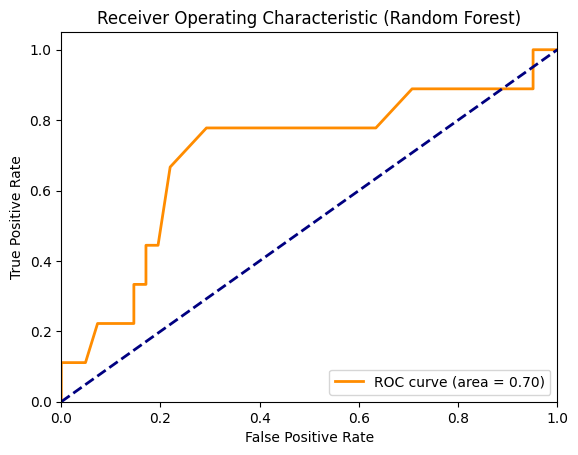

In [39]:
# Convert categorical labels to binary labels
y_test_binary = y_test.replace({'No': 0, 'Yes': 1})

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Calculate ROC curve and AUC score
if hasattr(rf_classifier, "predict_proba"):
    prob_pos_rf = rf_classifier.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos_rf = rf_classifier.decision_function(X_test)
    prob_pos_rf = (prob_pos_rf - prob_pos_rf.min()) / (prob_pos_rf.max() - prob_pos_rf.min())

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, prob_pos_rf)
auc_rf = roc_auc_score(y_test_binary, prob_pos_rf)
print(f"Random Forest AUC: {auc_rf:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on test set
y_pred = rf.predict(X_test)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, pos_label='Yes', average=None)
recall = recall_score(y_test, y_pred, pos_label='Yes', average=None)
f1 = f1_score(y_test, y_pred, pos_label='Yes', average=None)

# Print the metrics
print(f"Precision: Class 0 = {precision[0]:.2f}, Class 1 = {precision[1]:.2f}")
print(f"Recall: Class 0 = {recall[0]:.2f}, Class 1 = {recall[1]:.2f}")
print(f"F1-score: Class 0 = {f1[0]:.2f}, Class 1 = {f1[1]:.2f}")

Precision: Class 0 = 0.84, Class 1 = 1.00
Recall: Class 0 = 1.00, Class 1 = 0.11
F1-score: Class 0 = 0.91, Class 1 = 0.20


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# Balance the Data anda train again

In [41]:
df1 = df

In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Split data into features and target
X = df1.drop(['Drug 1', 'Drug2', 'Combination', 'Synergy'], axis=1)
y = df1['Synergy']

# Instantiate SMOTE
smote = SMOTE()

# Fit and apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_resampled))

Original dataset shape: Counter({'No': 201, 'Yes': 45})
Resampled dataset shape: Counter({'No': 201, 'Yes': 201})


In [49]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on test set
y_pred = rf.predict(X_test)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, pos_label='Yes', average=None)
recall = recall_score(y_test, y_pred, pos_label='Yes', average=None)
f1 = f1_score(y_test, y_pred, pos_label='Yes', average=None)

# Print the metrics
print(f"Precision: Class 0 = {precision[0]:.2f}, Class 1 = {precision[1]:.2f}")
print(f"Recall: Class 0 = {recall[0]:.2f}, Class 1 = {recall[1]:.2f}")
print(f"F1-score: Class 0 = {f1[0]:.2f}, Class 1 = {f1[1]:.2f}")



Precision: Class 0 = 0.88, Class 1 = 0.84
Recall: Class 0 = 0.86, Class 1 = 0.86
F1-score: Class 0 = 0.87, Class 1 = 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# Subject the model to the training set

Precision: 0.84
Recall: 0.86
F1-score: 0.85
AUC-ROC: 0.95


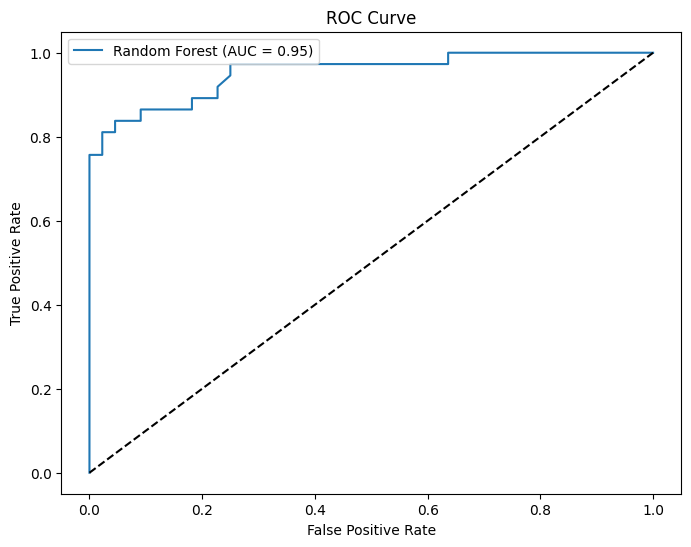

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode target variable
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Make predictions on test set
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Calculate AUC-ROC
auc = roc_auc_score(y_test_encoded, y_prob)

# Print metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# make a prediction on the entire data set

In [55]:
# Make predictions on the entire dataset
y_pred = rf.predict(df1.drop(['Drug 1', 'Drug2', 'Combination', 'Synergy'], axis=1))

In [63]:
df_pred = df1[['Drug 1', 'Drug2', 'Combination']].copy()
df_pred['Predicted_Synergy'] = y_pred

# Filter for 'Yes' predictions
yes_combinations = df_pred.loc[df_pred['Predicted_Synergy'] == 'Yes']

# Print the combinations predicted as 'Yes'
print(yes_combinations)

# Count the number of unique 'Yes' combinations
num_yes = yes_combinations['Combination'].nunique()
print(f"Number of unique 'Yes' combinations: {num_yes}")

                 Drug 1          Drug2                      Combination  \
3    4hydroxytamoxifene    fluconazole   4hydroxytamoxifene+fluconazole   
19             apicidin    fluconazole             apicidin+fluconazole   
33      castanospermine    fluconazole      castanospermine+fluconazole   
36       chlorpromazine    fluconazole       chlorpromazine+fluconazole   
37         chromium-III    fluconazole         chromium-III+fluconazole   
41         clotrimazole    fluconazole         clotrimazole+fluconazole   
42             colistin    fluconazole             colistin+fluconazole   
46          cyclosporin    fluconazole          cyclosporin+fluconazole   
47        cyproconazole    fluconazole        cyproconazole+fluconazole   
49         deferoxamine    fluconazole         deferoxamine+fluconazole   
50         desiperimine    fluconazole         desiperimine+fluconazole   
54        fenpropimorph    fluconazole        fenpropimorph+fluconazole   
55                FK506  

In [64]:
yes_combinations.to_csv('yes_combinations.csv', index=False)

In [65]:
non_synergistic_combinations = df_pred.loc[df_pred['Predicted_Synergy'] == 'No']

In [66]:

print("\nNon-Synergistic Combinations:")
print(non_synergistic_combinations)


Non-Synergistic Combinations:
                     Drug 1        Drug2                         Combination  \
0       2aminobenzothiazole  fluconazole     2aminobenzothiazole+fluconazole   
1    2hydroxyethylhydrazine  fluconazole  2hydroxyethylhydrazine+fluconazole   
2            3aminotriazole  fluconazole          3aminotriazole+fluconazole   
4                    A23187  fluconazole                  A23187+fluconazole   
5              abietic-acid  fluconazole            abietic-acid+fluconazole   
..                      ...          ...                                 ...   
241            geldanamycin  tunicamycin            geldanamycin+tunicamycin   
242            geldanamycin   usnic-acid             geldanamycin+usnic-acid   
243            geldanamycin  valinomycin            geldanamycin+valinomycin   
244            geldanamycin   verrucarin             geldanamycin+verrucarin   
245            geldanamycin        ZnCl2                  geldanamycin+ZnCl2   

    Pred

In [67]:

non_synergistic_combinations.to_csv('non_synergistic_combinations.csv', index=False)

# identify features that were important in getting synergy

In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already trained your random forest model 'rf'
# and your dataset is in a DataFrame 'data'

# Get the feature names
feature_names = df1.drop(['Drug 1', 'Drug2', 'Combination', 'Synergy'], axis=1).columns

# Get the feature importance scores
importances = rf.feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Print the top N important features
N = 10  # Number of top features to display
print(f"Top {N} important features:")
print(feature_importance.head(N))

Top 10 important features:
                     Feature  Importance
1584  Joint_Substructure_134    0.019141
1269                    1269    0.017620
349                      349    0.016102
398                      398    0.015894
1423                    1423    0.015875
257                      257    0.013039
224                      224    0.011297
989                      989    0.010989
1500   Joint_Substructure_50    0.010775
1553  Joint_Substructure_103    0.010557


In [69]:
feature_importance.to_csv('important_features.csv')